<a href="https://colab.research.google.com/github/Bgudapati1/733-Assignment/blob/main/DataMining_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install latest version of pandas profiling

!pip install pandas-profiling==3.6.6

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# import dataset and read first 10 rows

df=pd.read_csv('faithful.csv')
df.head(10)

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85
5,2.883,55
6,4.700,88
7,3.600,85
8,1.950,51
9,4.350,85


In [ ]:
from pandas_profiling import ProfileReport
# Profiling the dataset

prof_dataset = ProfileReport(df)
prof_dataset.to_notebook_iframe()

<ipython-input-19-b1005c56991f>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Problem 1 (25 points)

---
a. Create and print out a scatter plot of this dataset, eruption time versus waiting time. (10 points)


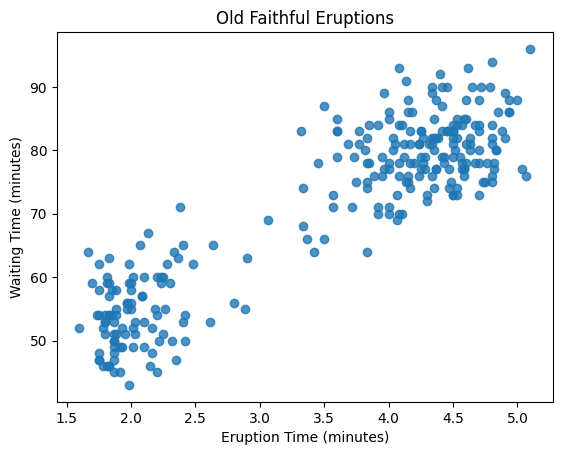

In [ ]:
df.columns
plt.scatter(df['eruptions'], df['waiting'], alpha=0.8)

plt.title('Old Faithful Eruptions')
plt.xlabel('Eruption Time (minutes)')
plt.ylabel('Waiting Time (minutes)')

plt.show()

b. How many clusters do you see based on your scatter plot? For the purposes of this question, a cluster is a “blob” of many data points that are close together, with regions of fewer data points between it and other “blobs”/clusters. (5 points)


Answer : We can see 2 Clusters in the above scatter plot.

c. Describe the steps of a hierarchical clustering algorithm. Based on your scatter plot, would this method be appropriate for this dataset? (10 points) 

Answer : Hierarchical clustering is a clustering algorithm that groups similar data points into clusters by creating a hierarchy of clusters. The steps involved in a hierarchical clustering algorithm are as follows:

1. Start by considering each data point as a separate cluster.
2. Calculate the distance or similarity between all pairs of clusters.
3. Merge the two closest clusters into a new cluster.
4. Recalculate the distance or similarity between the new cluster and the       remaining clusters.
5. Repeat steps 3 and 4 until all data points are in a single cluster or until a desired number of clusters is obtained.

Yes, based on the scatter plot this method would be appropriate for this dataset.



Problem 2 (75 points)


---
Implement the k-means algorithm in Python, and use it to perform clustering on the Old Faithful dataset. Use the number of clusters that you identified in Problem 1. Be sure to ignore the first column, which contains instance ID numbers. In your notebook, including the following items:

a. Your source code for the k-means algorithm. You need to implement the algorithm from scratch. Don’t forget to add comments to your code to make it readable (45 points)

b. A scatter plot of your final clustering, with the data points in each cluster color-coded, or plotted with different symbols. Include the cluster centers in your plot. (10 points)


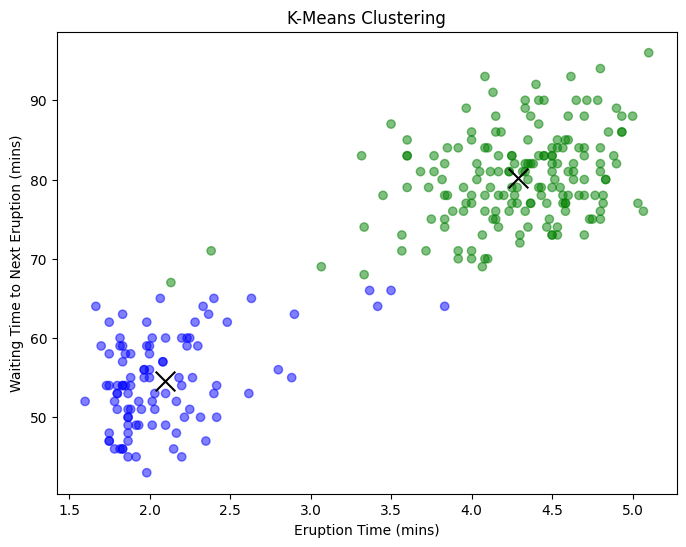

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('faithful.csv', usecols=['eruptions', 'waiting'])

# Number of clusters
k = 2

# Randomly initialize centroids
centroids = {
    i+1: [np.random.randint(0,8), np.random.randint(0,100)]
    for i in range(k)
}

# Assign data points to clusters
def assign_clusters(df, centroids):
    # Calculate the distance between each data point and each centroid
    for i in centroids.keys():
        df[f'distance_from_{i}'] = np.sqrt((df['eruptions'] - centroids[i][0])**2 + (df['waiting'] - centroids[i][1])**2)
    # Determine the closest centroid for each data point
    centroid_distance_cols = [f'distance_from_{i}' for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = np.where(df['closest']==1, 'r', 'g')
    return df

# Update centroids
def update_centroids(df, centroids):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['eruptions'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['waiting'])
    return centroids

# Repeat until convergence
def k_means(df, k, centroids):
    # Assign initial clusters
    df = assign_clusters(df, centroids)
    # Store previous closest centroid for convergence check
    temp = df['closest'].copy()
    # Update centroids
    centroids = update_centroids(df, centroids)
    # Repeat until convergence
    while True:
        # Assign clusters
        df = assign_clusters(df, centroids)
        # Store previous closest centroid for convergence check
        temp = df['closest'].copy()
        # Update centroids
        centroids = update_centroids(df, centroids)
        # Check for convergence
        if temp.equals(df['closest']):
            break
    return df, centroids

# Run k-means algorithm
df, centroids = k_means(df, k, centroids)

# Plot final clusters and centroids
fig, ax = plt.subplots(figsize=(8,6))
colors = ['blue', 'green']
plt.scatter(df['eruptions'], df['waiting'], c=[colors[i-1] for i in df['closest']], alpha=0.5)
# plt.scatter(df['eruptions'], df['waiting'], color=df['color'], alpha=0.5)
for i in centroids.keys():
    plt.scatter(*centroids[i], color='k', marker='x', s=200)
plt.title('K-Means Clustering')
plt.xlabel('Eruption Time (mins)')
plt.ylabel('Waiting Time to Next Eruption (mins)')
plt.show()

c. A plot of the k-means objective function versus iterations of the algorithm. Recall that the objective function is  (10 points)

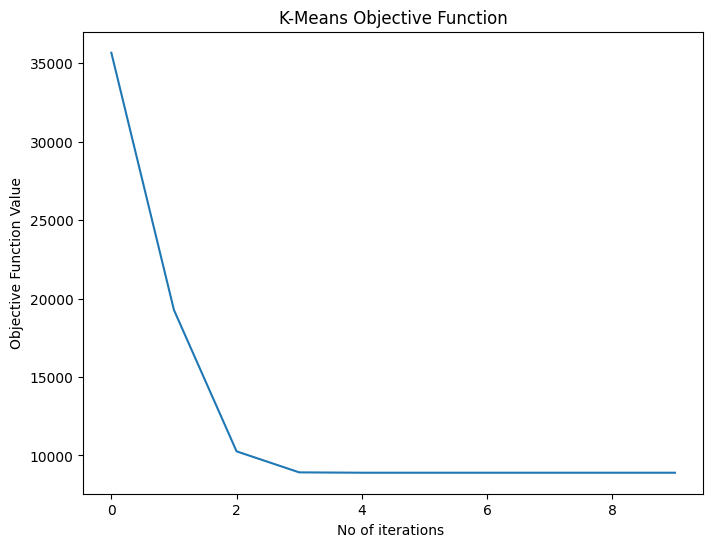

In [ ]:
# Load the dataset
df = pd.read_csv('faithful.csv', usecols=['eruptions', 'waiting'])

def k_means(data, k, max_iterations):
    # Initialize the centroids randomly
    centroids = data.sample(k)
    
    # Initialize clusters and distances
    distances = pd.DataFrame()
    clusters = pd.DataFrame()
    
    objective_function_values = []
    
    for i in range(max_iterations):
        # Assign each point to the closest centroid
        for j in range(k):
            distances['centroid'+str(j)] = np.sqrt(((data - centroids.iloc[j])**2).sum(axis=1))
        clusters = pd.DataFrame({'cluster': distances.idxmin(axis=1)})
        clusters = clusters.replace({'cluster': {'centroid0': 0, 'centroid1': 1}})
        
        # Update the centroids
        for j in range(k):
            centroids.iloc[j] = data[clusters['cluster']==j].mean()
        
        # Compute the k-means objective function
        objective_function_value = 0
        for j in range(k):
            objective_function_value += ((data[clusters['cluster']==j] - centroids.iloc[j])**2).sum().sum()
        objective_function_values.append(objective_function_value)
    
    # Return the final clusters, centroids, and objective function values
    return clusters, centroids, objective_function_values

# Run k-means algorithm
df, centroids, obj_func_history = k_means(df, 2, 10)

# Plot objective function history
fig, ax = plt.subplots(figsize=(8,6))
plt.plot(obj_func_history)
plt.title('K-Means Objective Function')
plt.xlabel("No of iterations ")
plt.ylabel('Objective Function Value')
plt.show()


d. Did the method manage to find the clusters that you identified in Problem 1? If not, did it help to run the method again with another random initialization? (10 points)


Answer : Yes this method helped me find the clusters in problem 1.

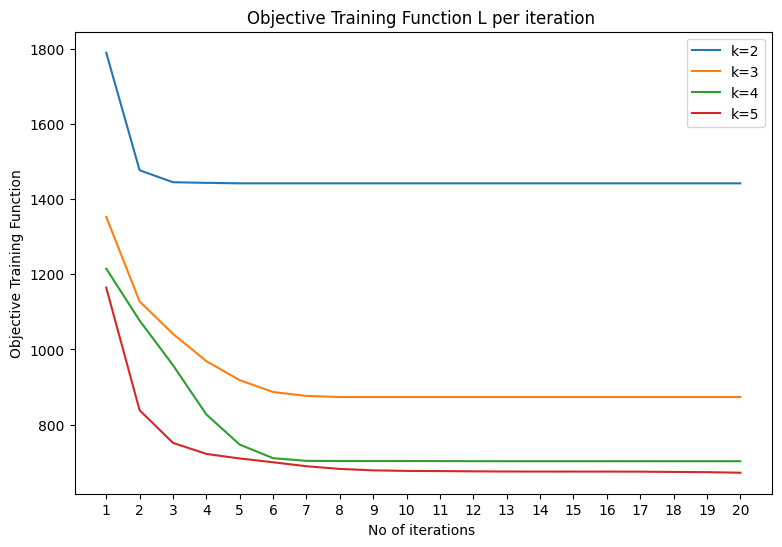

In [ ]:
# tried another approach
# not a part of assignment

import pandas as pd
import random
import re
%matplotlib inline
import numpy as np
from scipy import stats, integrate
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import random
from numpy.random import randn

mean1=[0,0]
cov =[[1,0], [0,1]] 
mean2=[3,0]
mean3=[0,3]
wt=[0.2, 0.5, 0.3]

x1 = np.random.multivariate_normal (mean1, cov, (100)) 
x2 = np.random.multivariate_normal (mean2, cov, (250))
x3 = np.random.multivariate_normal (mean3, cov, (150)) 
x = np.vstack ((x1,x2, x3))

x.shape
def pick_mu(k):
  x_copy=x
  np.random.shuffle(x_copy)
  mu=x_copy[:k]
  return  mu

def kmeans(k):
    c = np.zeros(500).astype(int)
    c = c.astype(int)
    L = []
    mu = pick_mu(k)

    for t in range(20):
        for i in range(x.shape[0]):
            dist = []
            for k1 in range(k):
                dist.append(np.sqrt(np.sum((x[i]-mu[k1])**2)))
            c[i] = np.argmin(dist)

        for k1 in range(k):
            nk = np.sum(c == k1)
            if nk > 0:
                val = np.sum(x[c == k1], axis=0)
                mu[k1] = val / nk

        sum1 = 0
        for i in range(x.shape[0]):
            for k1 in range(k):
                if c[i] == k1:
                    sum1 += np.sum((x[i]-mu[k1])**2)
        L.append(sum1)

    return L, mu, c

x_axis2 = np.arange(1, 21)
import matplotlib.pyplot as plt
plt.figure(figsize=(9,6))
l2, mu2, c2=kmeans(2)
plt.plot(x_axis2, l2, label="k=2")
l3, mu3, c3=kmeans(3)
plt.plot(x_axis2, l3, label="k=3")
l4, mu4, c4=kmeans(4) 
plt.plot(x_axis2,l4,label="k=4")
l5, mu5,c5=kmeans(5)
plt.plot(x_axis2, l5, label="k=5") 
plt.xticks(np.arange(min(x_axis2), max(x_axis2)+1, 1.0))
plt.legend (loc='upper right')
plt.title("Objective Training Function L per iteration ") 
plt.xlabel("No of iterations ")
plt.ylabel("Objective Training Function")
plt.show()